In [3]:
# Load openai

import os
from openai import OpenAI
from pydantic import BaseModel, Field
import pandas as pd

In [4]:
client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

In [ ]:
# Just once

class RandomNumber(BaseModel):
    number: int = Field(ge=1, le=100)

response = client.responses.parse(
    model="gpt-4.1-mini",
    input="Give me a random number between 1 and 100.",
    text_format=RandomNumber,
)

data = response.output_parsed
print(data.number)        # integer
print(data.model_dump())  # {'number': 57}

27
{'number': 27}


In [ ]:
class RandomNumber(BaseModel):
    number: int = Field(ge=1, le=100)

results = []

for i in range(100):
    print(i)
    response = client.responses.parse(
        model="gpt-4.1-mini",
        input="Give me a random number between 1 and 100.",
        text_format=RandomNumber,
    )

    data = response.output_parsed
    row = data.model_dump()
    row["run"] = i + 1   # optional but useful
    results.append(row)

# Convert to DataFrame



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


NameError: name 'pd' is not defined

In [25]:
df = pd.DataFrame(results)

# Save to CSV
df.to_csv("random_numbers.csv", index=False)

print(df.head())

   number  run
0      57    1
1      57    2
2      57    3
3      57    4
4      37    5


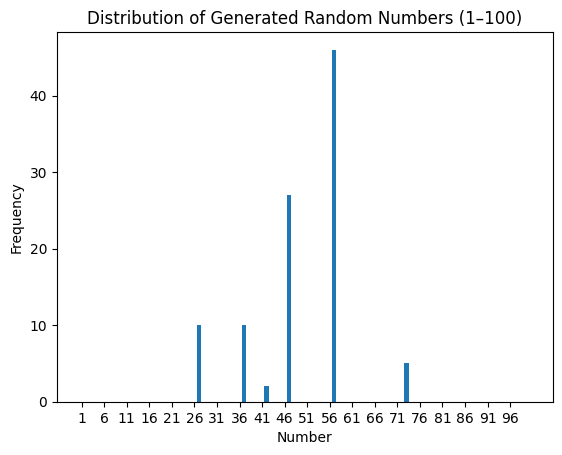

In [27]:
import matplotlib.pyplot as plt
import numpy as np

bins = np.arange(0.5, 100.5 + 1, 1)  # centers bins on integers 1–100

plt.figure()
plt.hist(df["number"], bins=bins)
plt.xlabel("Number")
plt.ylabel("Frequency")
plt.title("Distribution of Generated Random Numbers (1–100)")
plt.xticks(range(1, 101, 5))  # show every 5th tick to keep it readable
plt.show()

In [31]:
results = []

for i in range(100):
    print(i)
    response = client.responses.parse(
        model="gpt-4.1-mini",
        input=f"Give me a random number between 1 and 100. Random={i}",
        text_format=RandomNumber,
    )

    data = response.output_parsed
    row = data.model_dump()
    row["run"] = i + 1   # optional but useful
    results.append(row)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [32]:
df = pd.DataFrame(results)

# Save to CSV
df.to_csv("random_numbers_with_mod.csv", index=False)

print(df.head())

   number  run
0      42    1
1      27    2
2      42    3
3       3    4
4       4    5


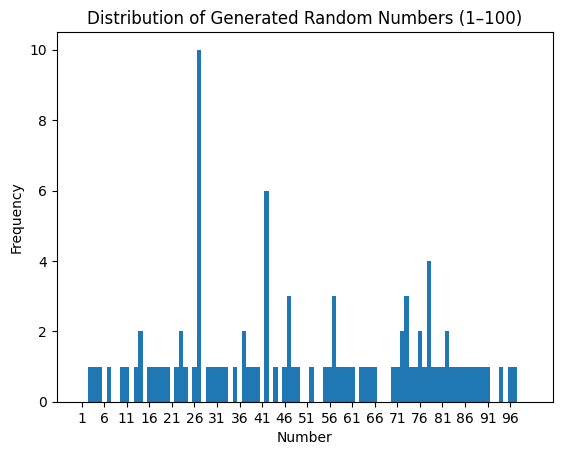

In [33]:
import matplotlib.pyplot as plt
import numpy as np

bins = np.arange(0.5, 100.5 + 1, 1)  # centers bins on integers 1–100

plt.figure()
plt.hist(df["number"], bins=bins)
plt.xlabel("Number")
plt.ylabel("Frequency")
plt.title("Distribution of Generated Random Numbers (1–100)")
plt.xticks(range(1, 101, 5))  # show every 5th tick to keep it readable
plt.show()

In [6]:
from pydantic import BaseModel, Field
from typing import List

class RandomNumbers(BaseModel):
    numbers: List[int] = Field(
        min_items=5,
        max_items=5,
        description="Five random integers between 1 and 100"
    )
rows = []

for i in range(100):
    print(i)

    response = client.responses.parse(
        model="gpt-4.1-mini",
        input=f"Give me 5 random numbers between 1 and 100. Random={i}",
        text_format=RandomNumbers,
    )

    numbers = response.output_parsed.numbers

    for j, n in enumerate(numbers, start=1):
        rows.append({
            "run": i + 1,
            "draw": j,      # 1–5 within run
            "number": n
        })

df = pd.DataFrame(rows)


/tmp/ipykernel_2593826/3291658624.py:5: PydanticDeprecatedSince20: `min_items` is deprecated and will be removed, use `min_length` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.12/migration/
  numbers: List[int] = Field(
/tmp/ipykernel_2593826/3291658624.py:5: PydanticDeprecatedSince20: `max_items` is deprecated and will be removed, use `max_length` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.12/migration/
  numbers: List[int] = Field(


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [8]:
# Save to CSV
df.to_csv("5random_numbers_with_mod.csv", index=False)

print(df.head())

   run  draw  number
0    1     1      17
1    1     2      42
2    1     3      63
3    1     4       8
4    1     5      95


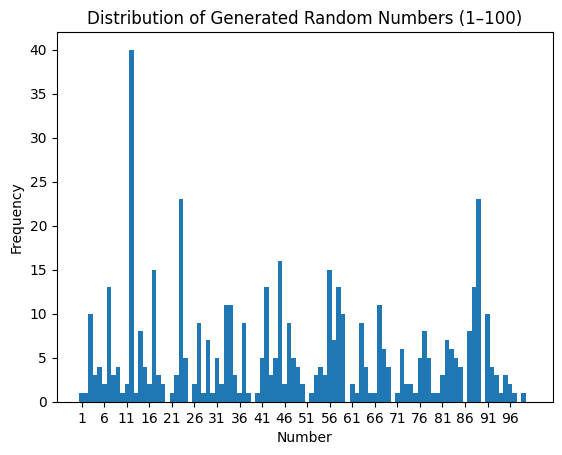

In [11]:
import matplotlib.pyplot as plt
import numpy as np

bins = np.arange(0.5, 100.5 + 1, 1)  # centers bins on integers 1–100

plt.figure()
plt.hist(df["number"], bins=bins)
plt.xlabel("Number")
plt.ylabel("Frequency")
plt.title("Distribution of Generated Random Numbers (1–100)")
plt.xticks(range(1, 101, 5))  # show every 5th tick to keep it readable
plt.show()

In [12]:
from pydantic import BaseModel, Field
from typing import List

class RandomNumbers(BaseModel):
    numbers: List[int] = Field(
        min_items=5,
        max_items=5,
        description="Five random integers between 1 and 100"
    )
rows = []

for i in range(100):
    print(i)

    response = client.responses.parse(
        model="gpt-4.1-mini",
        input=f"Give me 5 random numbers between 1 and 100.",
        text_format=RandomNumbers,
    )

    numbers = response.output_parsed.numbers

    for j, n in enumerate(numbers, start=1):
        rows.append({
            "run": i + 1,
            "draw": j,      # 1–5 within run
            "number": n
        })

df = pd.DataFrame(rows)


/tmp/ipykernel_2593826/4075931573.py:5: PydanticDeprecatedSince20: `min_items` is deprecated and will be removed, use `min_length` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.12/migration/
  numbers: List[int] = Field(
/tmp/ipykernel_2593826/4075931573.py:5: PydanticDeprecatedSince20: `max_items` is deprecated and will be removed, use `max_length` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.12/migration/
  numbers: List[int] = Field(


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [13]:
# Save to CSV
df.to_csv("5random_numbers.csv", index=False)

print(df.head())

   run  draw  number
0    1     1      23
1    1     2      57
2    1     3      88
3    1     4      14
4    1     5      46


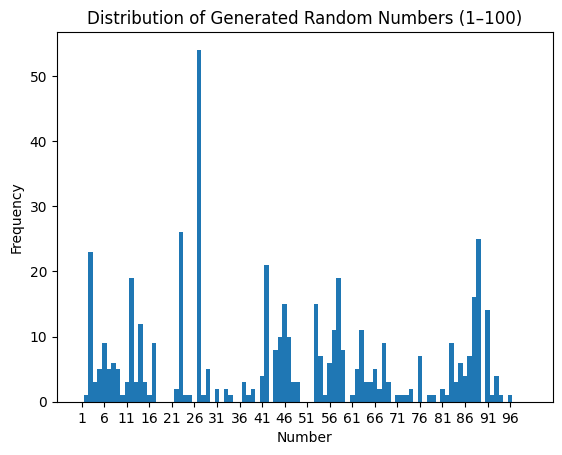

In [14]:
import matplotlib.pyplot as plt
import numpy as np

bins = np.arange(0.5, 100.5 + 1, 1)  # centers bins on integers 1–100

plt.figure()
plt.hist(df["number"], bins=bins)
plt.xlabel("Number")
plt.ylabel("Frequency")
plt.title("Distribution of Generated Random Numbers (1–100)")
plt.xticks(range(1, 101, 5))  # show every 5th tick to keep it readable
plt.show()